# BigMart Sales Prediction

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Step 1: Load Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
train.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
test.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5676,False,False,False,False,False,False,False,False,False,False,False
5677,False,False,False,False,False,False,False,False,False,False,False
5678,False,False,False,False,False,False,False,False,True,False,False
5679,False,False,False,False,False,False,False,False,True,False,False


In [9]:
# Step 2: Data Preprocessing
# Fill Missing Values
train["Item_Weight"].fillna(train["Item_Weight"].median(), inplace=True)
test["Item_Weight"].fillna(test["Item_Weight"].median(), inplace=True)
train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0], inplace=True)
test["Outlet_Size"].fillna(test["Outlet_Size"].mode()[0], inplace=True)

In [10]:
# Fix Inconsistent 'Item_Fat_Content'
train["Item_Fat_Content"].replace({"LF": "Low Fat", "low fat": "Low Fat", "reg": "Regular"}, inplace=True)
test["Item_Fat_Content"].replace({"LF": "Low Fat", "low fat": "Low Fat", "reg": "Regular"}, inplace=True)

In [11]:
# Create New Features
train["Outlet_Age"] = 2024 - train["Outlet_Establishment_Year"]
test["Outlet_Age"] = 2024 - test["Outlet_Establishment_Year"]
train['Weight_MRP'] = train['Item_Weight'] * train['Item_MRP']
test['Weight_MRP'] = test['Item_Weight'] * test['Item_MRP']

In [12]:
# Step 3: Encode Categorical Variables
encoder = LabelEncoder()
cat_columns = ["Item_Fat_Content", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type", "Item_Type", "Outlet_Identifier"]
for col in cat_columns:
    train[col] = encoder.fit_transform(train[col])
    test[col] = encoder.transform(test[col])

In [13]:
# Step 4: Prepare Data
X = train.drop(columns=["Item_Outlet_Sales", "Item_Identifier", "Outlet_Establishment_Year"])
y = train["Item_Outlet_Sales"]
test_final = test.drop(columns=["Item_Identifier", "Outlet_Establishment_Year"])

In [14]:
# Outlier Capping in Target Variable
upper_limit = np.percentile(y, 99)
y = np.clip(y, None, upper_limit)
print("Outliers capped at 99th percentile.")

Outliers capped at 99th percentile.


In [15]:
# Align train and test data
X, test_final = X.align(test_final, join='inner', axis=1)

In [16]:
# Step 5: Feature Scaling
scaler = StandardScaler()
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age', 'Weight_MRP']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
test_final[numerical_columns] = scaler.transform(test_final[numerical_columns])

In [17]:
# Train-Test Split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Step 6: Hyperparameter Tuning
param_xgb = {"n_estimators": [300, 400], "learning_rate": [0.01, 0.05], "max_depth": [5, 7]}
xgb = GridSearchCV(XGBRegressor(random_state=42), param_xgb, cv=5, scoring="neg_root_mean_squared_error", verbose=1)
xgb.fit(X_train, y_train)
best_xgb = xgb.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [19]:
param_rf = {"n_estimators": [300, 400], "max_depth": [15, 20]}
rf = GridSearchCV(RandomForestRegressor(random_state=42), param_rf, cv=5, scoring="neg_root_mean_squared_error", verbose=1)
rf.fit(X_train, y_train)
best_rf = rf.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


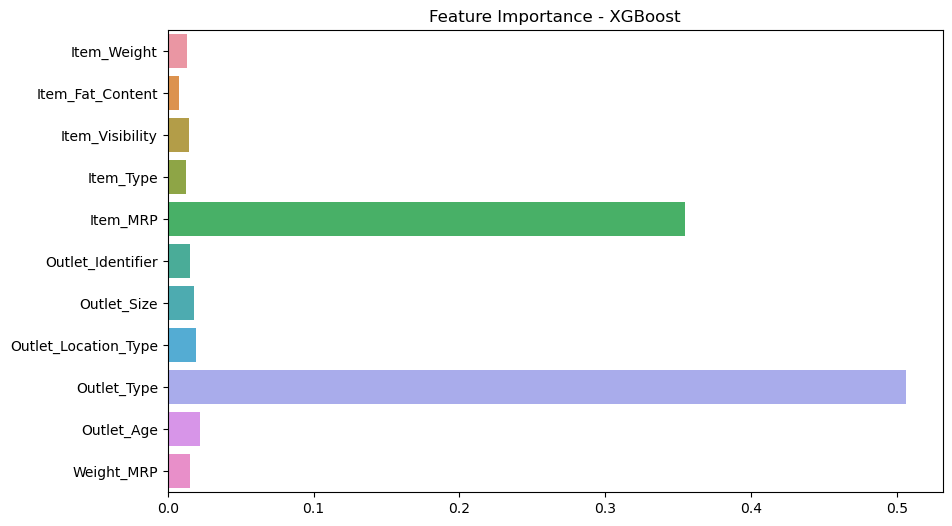

In [20]:
# Feature Importance from Best XGBoost Model

importances = best_xgb.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - XGBoost")
plt.show()

In [21]:
# Step 7: Stacking Ensemble
# Add Gradient Boosting to Stacking Ensemble
estimators = [
    ('xgb', best_xgb),
    ('rf', best_rf),
    ('gbr', GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, random_state=42))
]
final_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
final_model.fit(X_train, y_train)

StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=400, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('rf',
                               RandomForestRegressor(max_depth=15,
                                                     n_estimators=300,
                                                     random_state=42)),
                              ('gbr',
                               GradientBoostingRegressor(learning_rate=0.05,
                                                         n_estimators=300,
                                                         random_state=42))],
                  final_estimator=LinearRegression())

In [22]:
# Step 8: Validation
y_pred_valid = final_model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 1000.2631


In [23]:
# Step 9: Final Predictions
final_predictions = final_model.predict(test_final)

In [24]:
# Step 10: Generate Submission File
submission = sample_submission.copy()
submission['Item_Outlet_Sales'] = final_predictions
submission.to_csv('final_submission_optimized.csv', index=False)
print("Final submission file saved as 'final_submission_optimized.csv'")

Final submission file saved as 'final_submission_optimized.csv'
